# Analyzing data from the Global Historical Climatology Network with Pandas

We began by importing the data from the csv file. "parse_dates=True" is used to convert the dates from integers (YYYYMMDD) to a python timestamp format which allows for the month and year to be pulled directly. Some of the collumns are scaled to change to standard units

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#import data
data = pd.read_csv("./598354.csv", parse_dates = ["DATE"])
data['TMAX'] *= 0.1 #changing units from tenths of C to C
data['TMIN'] *= 0.1
data['PRCP'] *= 0.1 #changing units from tenths of mm to mm

Then we filter the data to get only the data at Lee Vining, CA. Lee Vining, CA was chosen by exploring the data to find the location with the most rain in June 2015.

In [15]:
dataAtLoc = data[data.STATION_NAME == "LEE VINING CA US"]

Now the temperature data can be plotted. A filtering is done to remove data points at -9999 which corresponds to not having data. Multiple plots are done at once using a list of series to be plotted with surprisingly simple syntax. 

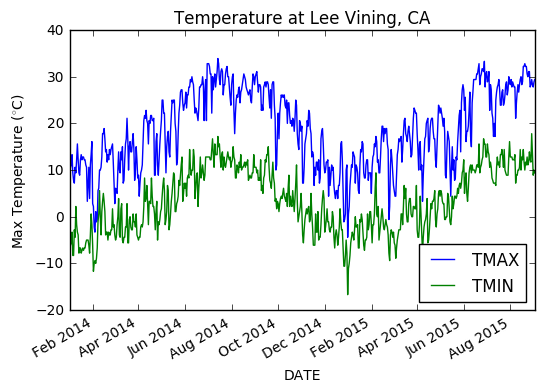

In [22]:
dataAtLoc[dataAtLoc.TMAX != -9999].plot('DATE', ['TMAX', 'TMIN'], title='Temperature at Lee Vining, CA')\
                                  .set_ylabel('Max Temperature ($^{\circ}$C)')

We also want to plot the precipitation in June 2015. A filtering is done via a lambda function that returns a bool corresponding to whether the data is in June 2015.

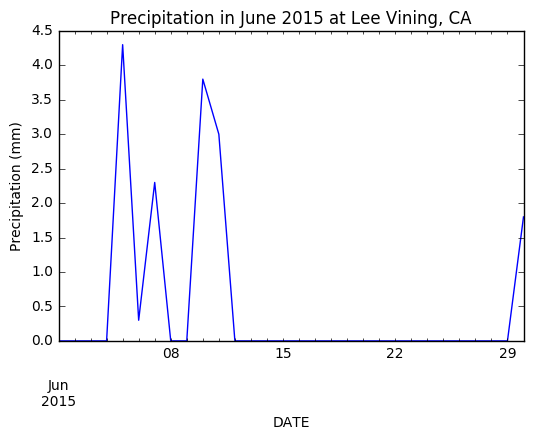

In [21]:
dataAtLoc[dataAtLoc['DATE'].map(lambda x: x.month == 6 and x.year == 2015)]\
                           .plot('DATE', 'PRCP', legend=False, title='Precipitation in June 2015 at Lee Vining, CA')\
                           .set_ylabel('Precipitation (mm)')